In [10]:
#Importando Pacotes:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd
import altair as alt
import os as os
#Importando Módulos:
from freedom import freedom
from data import data
from analyze import analyze
#Importando Mais Limpeza de dados:
import clean_data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
#Criando DataFrameResumido
market = analyze(data,"Market capitalization of listed domestic companies (current US$)")[[str(num) for num in range(1987,2018)]]
list_year= [str(num) for num in range(1987,2018)]
top_market=pd.DataFrame()
for i in list_year:
    market = pd.DataFrame(market[i])
    market = market[market[i]>0].sort_values(i)[-4:]
    top_market = pd.concat([top_market, market], axis=1, sort=False)
    market = analyze(data,"Market capitalization of listed domestic companies (current US$)")[[str(num) for num in range(1987,2018)]]
top_market=top_market.fillna(0)
top_market=market.T[top_market.index].T

In [3]:
top_market_chart=pd.DataFrame()
for i in top_market.index:
        x=pd.DataFrame({'year':top_market.columns,'Country':[i]*len(top_market.columns),'Market Capitalization':top_market.T[i]})
        top_market_chart=pd.concat([top_market_chart,x])
top_market_chart=top_market_chart.fillna(0)
top_market_chart

,year,Country,Market Capitalization
1987,1987,Canada,4.056009e+11
1988,1988,Canada,4.468064e+11
1989,1989,Canada,5.433966e+11
1990,1990,Canada,4.586786e+11
1991,1991,Canada,5.086332e+11
1992,1992,Canada,4.579499e+11
1993,1993,Canada,5.955164e+11
1994,1994,Canada,5.757164e+11
1995,1995,Canada,6.717428e+11
1996,1996,Canada,8.797976e+11


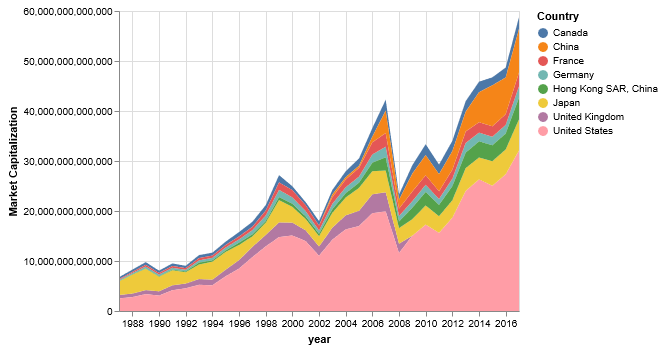

In [11]:
chart=alt.Chart(top_market_chart).mark_area().encode(
    x='year:T',
    y='Market Capitalization:Q',
    color='Country:N'
)
chart